# Problem 5

Using Julia.  Feel free to use Julia, Python, or Matlab. 

In [145]:
using Plots
α = 1; β = 1.; γ = 1; δ = 1.;
f = u -> [α*u[1] - β*u[1]*u[2], δ*u[1]*u[2] - γ*u[2]]

#21 (generic function with 1 method)

In [194]:
# Forward Euler
k = 0.001
n = convert(Int64,50/k)
U = zeros(2,n+1)
t = zeros(n+1)
U[:,1] = [5.,.8]
t[1] = 0.
for i = 2:n+1
    U[:,i] = U[:,i-1] + k*f(U[:,i-1])
    t[i] = t[i-1] + k
end

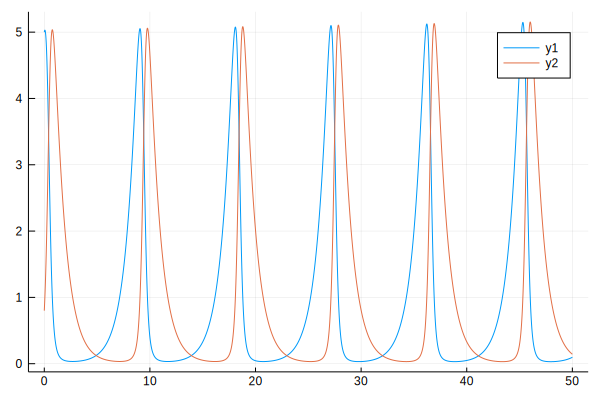

In [195]:
plot(t,U[1,:])
plot!(t,U[2,:]) # plot! is the same has "hold on" in Matlab

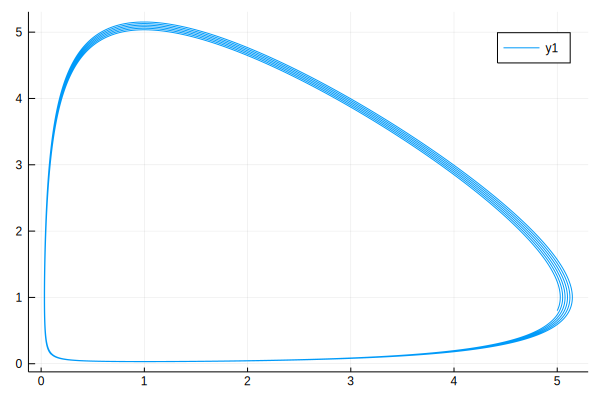

In [196]:
plot(U[1,:],U[2,:])

For backward Euler, at each time step, we need to solve

$$
U_{n+1} = U_n + kf(U_{n+1})
$$

for $U_{n+1}$.  Thus, we need to find a zero of the function

$$
 g(U) = U - U_n - kf(U).
$$

The Jacobian is easy to compute

$$
    D_U g(U) = \begin{bmatrix} 1 - k\alpha + k\beta U_2 &  k\beta U_1 \\
    - k \delta U_2 & 1 + k \gamma - k \delta U_1 \end{bmatrix}.
$$
And for each $n$, Newton's method becomes:

$$U_{n+1}^{(0)} = U_n$$
$$U_{n+1}^{(k+1)} = U_{n+1}^{(k)} - [D_U g(U_{n+1}^{(k)})]^{-1} g(U_{n+1}^{(k)})$$


In [197]:
g = (U,Un) -> U - Un - k*f(U)
Dg = (U) -> [1-k*α+k*β*U[2] k*β*U[1]; -k*δ*U[2] 1+k*γ-k*δ*U[1]]

#38 (generic function with 1 method)

In [202]:
# Backward Euler
k = 0.001
max_iter = 100
n = convert(Int64,50/k)
U = zeros(2,n+1)
t = zeros(n+1)
U[:,1] = [5.,.8]
t[1] = 0.
for i = 2:n+1
    Unew = copy(U[:,i-1])
    Uold = copy(U[:,i-1])
    for j = 1:max_iter
        Uold = Unew
        Unew = Uold - (Dg(Uold)\g(Uold,U[:,i-1]))
        #println(maximum(abs.(Unew-Uold)))
        if maximum(abs.(Unew-Uold)) < k/10
            break
        end
        
    end
    U[:,i] = Unew
    t[i] = t[i-1] + k
end

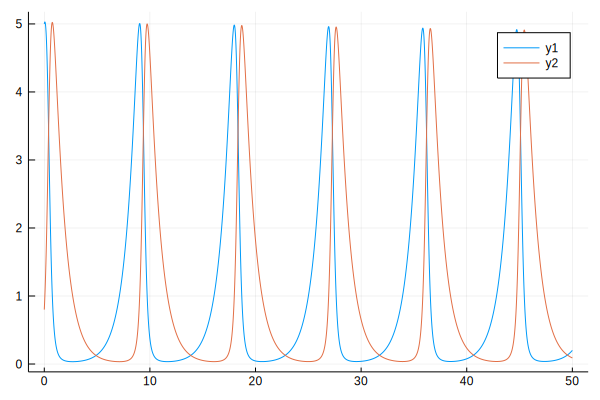

In [203]:
plot(t,U[1,:])
plot!(t,U[2,:]) # plot! is the same has "hold on" in Matlab

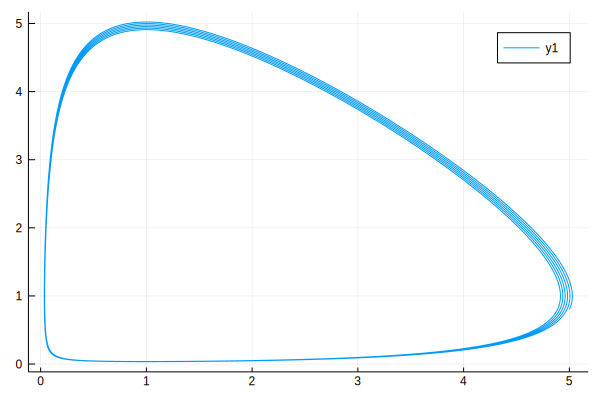

In [204]:
plot(U[1,:],U[2,:])